# Regression

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
x = np.array([1, 2, 3, 4])
np.vander(x, 4)

array([[ 1,  1,  1,  1],
       [ 8,  4,  2,  1],
       [27,  9,  3,  1],
       [64, 16,  4,  1]])

## \begin{bmatrix}1&x_{1}&x_{1}^{2}&\dots &x_{1}^{n-1}\\1&x_{2}&x_{2}^{2}&\dots &x_{2}^{n-1}\\1&x_{3}&x_{3}^{2}&\dots &x_{3}^{n-1}\\\vdots &\vdots &\vdots &\ddots &\vdots \\1&x_{m}&x_{m}^{2}&\dots &x_{m}^{n-1}\end{bmatrix}

In [3]:
# example 
x = np.array([1, 5, 6, 9, 12, 20])
y = np.array([2, 3, 4, 4, 8, 9])

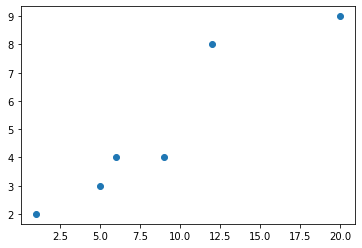

In [4]:
fig, ax = plt.subplots()
ax.scatter(x, y)

## $f(x) = ax^2 + bx + c$

In [5]:
A = np.vstack([np.ones_like(x), x, x**2]).T

In [6]:
A

array([[  1,   1,   1],
       [  1,   5,  25],
       [  1,   6,  36],
       [  1,   9,  81],
       [  1,  12, 144],
       [  1,  20, 400]])

In [7]:
xcap = np.linalg.inv(A.T@A)@A.T @ y

In [8]:
xcap

array([ 1.07668974,  0.5070764 , -0.00485471])

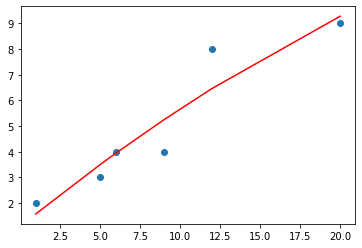

In [9]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, xcap[0] + xcap[1]*x + xcap[2]*x**2, 'r')

## Example

In [10]:
t = np.arange(1,11)
A = np.zeros((10,3))
A[:,0] = 1
A[:,1] = t
A[:,2] = -0.5 * t**2
l = np.matrix(np.array([[109.4,187.5,267.5,331.9,386.1,428.4,452.2,498.1,512.3,513.0]])).T
p = np.matrix(np.eye(10)/8)**2
xcap = np.linalg.inv(A.T*p*A)*A.T*p*l
print(f"the xcaps are \n{xcap}")

the xcaps are 
[[16.40833333]
 [96.97128788]
 [ 9.40833333]]


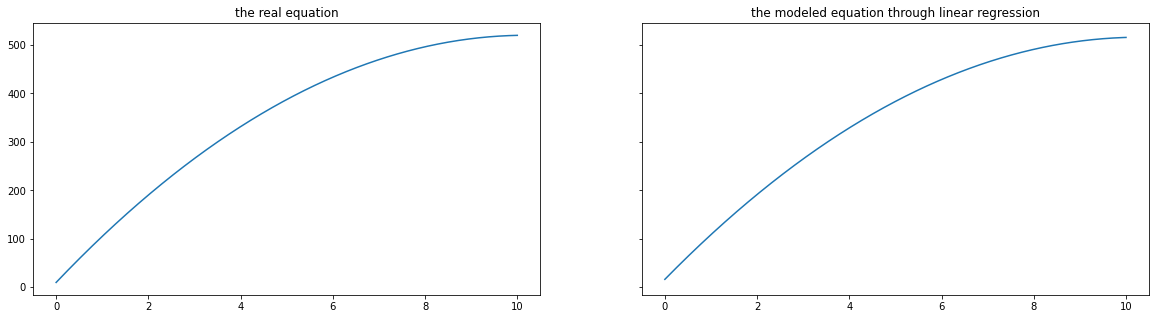

In [11]:
t = np.linspace(0,10,1000)
realeq = 10 + 100 * t - 0.5 *9.8 * t**2
eqcoeffcap = float(xcap[0]) + float(xcap [1])*t - 0.5 * float(xcap[2])* t**2
fig, ax =plt.subplots(1,2,figsize=(20,5),sharey =True )
ax[0].plot(t,realeq)
ax[0].set_title("the real equation")
ax[1].plot(t,eqcoeffcap)
ax[1].set_title("the modeled equation through linear regression")
plt.show()

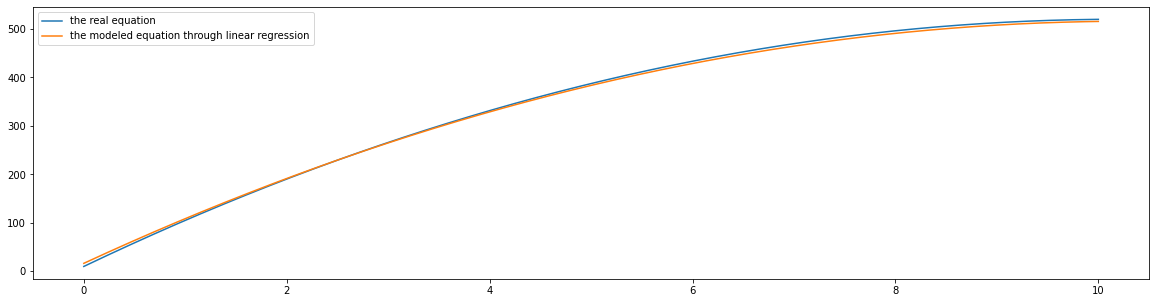

In [12]:
fig, ax =plt.subplots(figsize=(20,5))
ax.plot(t,realeq,label="the real equation")
ax.plot(t,eqcoeffcap,label="the modeled equation through linear regression")
plt.legend()
plt.show()

## Using sklearn to fit regression

In [13]:
x = np.linspace(1, 1.5, 100)

In [14]:
y_NOnoise = x**4 + 8*x**2 + 24

In [15]:
y = x**4 + 8*x**2 + 24 + np.random.randn(100) * 0.5 # we added noise to it

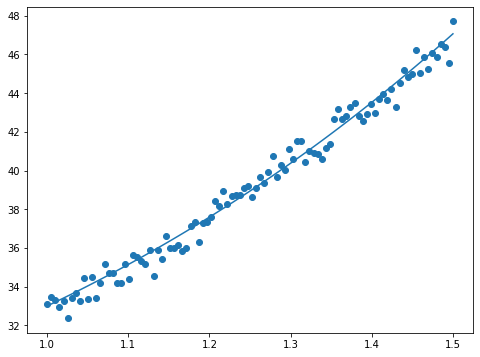

In [16]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(x,y_NOnoise)
ax.scatter(x, y)
plt.show()

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

Coefficients:  [[    0.         -2573.07416004  3077.7546782  -1614.5875733
    316.97664317]]
Intercept:  [826.05413237]


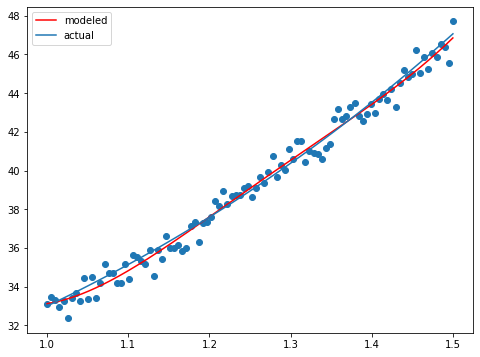

In [18]:
poly3 = PolynomialFeatures(degree=4)
train_x_poly3 = poly3.fit_transform(x.reshape(-1,1))
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, y.reshape(-1,1))
fig, ax = plt.subplots(1,1, figsize=(8,6))
# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
XX = np.arange(1, 1.5, 0.0001)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3) +clf3.coef_[0][4]*np.power(XX, 4)
ax.plot(XX, yy, '-r', label="modeled" )
ax.plot(x,y_NOnoise, label="actual")
ax.scatter(x, y)
plt.legend()
plt.show()

## Boston dataset

In [23]:
from sklearn.datasets import load_boston
import pandas as pd
import sklearn.metrics as met
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [24]:
data = load_boston()

In [25]:
x = data.data
y = data.target

In [26]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [27]:
df = pd.DataFrame(x , columns = data.feature_names)
df['Target/price'] = y

In [28]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target/price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [29]:
trainx, testx, trainy, testy = train_test_split(x,y, test_size=0.3, random_state=69)

In [30]:
model = LinearRegression()

In [31]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
ypred = model.predict(testx)

In [33]:
model.coef_

array([-1.07170557e-01,  4.63952195e-02,  2.08602395e-02,  2.68856140e+00,
       -1.77957587e+01,  3.80475246e+00,  7.51061703e-04, -1.47575880e+00,
        3.05655038e-01, -1.23293463e-02, -9.53463555e-01,  9.39251272e-03,
       -5.25466633e-01])

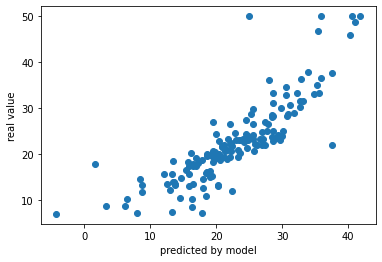

In [34]:
fig,ax = plt.subplots()
ax.scatter(ypred,testy)
plt.xlabel('predicted by model')
plt.ylabel('real value')
Xs=np.linspace(0,45,354)
plt.show()

In [35]:
df = pd.read_csv(r"C:\Users\Samina\Desktop\Junks\DataSets\indoneasia covid\archive\Indonesia_coronavirus_daily_data.csv")

In [36]:
df.head(5)

,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
0,01/03/2020,DKI JAKARTA,2,0,0,2,2,0,0,2
1,02/03/2020,DKI JAKARTA,2,0,0,2,4,0,0,4
2,03/03/2020,DKI JAKARTA,2,0,0,2,6,0,0,6
3,04/03/2020,DKI JAKARTA,2,0,0,2,8,0,0,8
4,05/03/2020,DKI JAKARTA,0,1,0,-1,8,0,1,7


In [37]:
df.Province = df.Province.apply(list(set(df.Province)).index)

In [38]:
df.head(5)

,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
0,01/03/2020,2,2,0,0,2,2,0,0,2
1,02/03/2020,2,2,0,0,2,4,0,0,4
2,03/03/2020,2,2,0,0,2,6,0,0,6
3,04/03/2020,2,2,0,0,2,8,0,0,8
4,05/03/2020,2,0,1,0,-1,8,0,1,7


In [39]:
df = df.drop('Date', axis=1)

In [40]:
y = df.Daily_Death
x = df.loc[: ,(df.columns != 'Daily_Death')]

In [41]:
trainx,testx,trainy,testy = train_test_split(x, y , test_size=0.3 ,random_state=69)

In [42]:
trainx.shape

(8621, 8)

In [43]:
model = LinearRegression()
model.fit(trainx ,trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
ypred = model.predict(testx)

In [45]:
met.mean_absolute_error(testy,ypred)

2.2670931827699438e-12

In [46]:
df = df.drop('Daily_Death', axis=1)

## Affect of different parameters on daily deaths

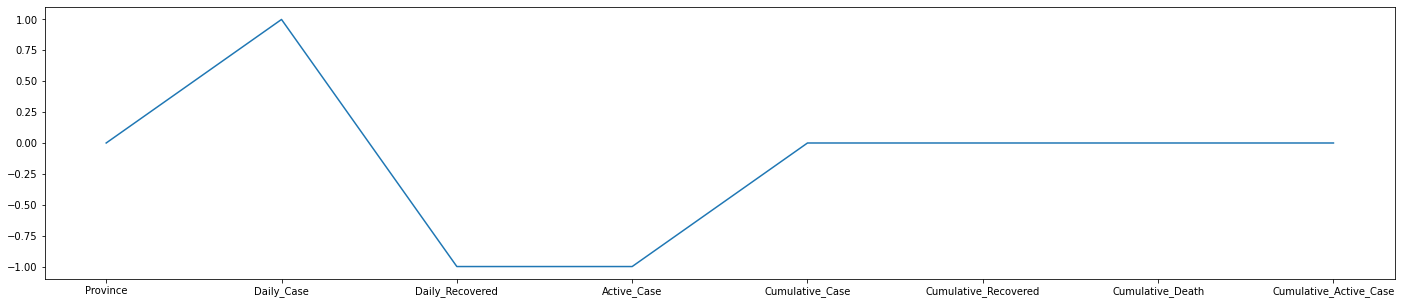

In [47]:
fig , ax = plt.subplots(figsize=(10,5))
ax.plot(range(8),model.coef_)
plt.xticks(range(8),df.columns)
fig.subplots_adjust(right=2)